# __Chapter 1: When it rains it pours (sometimes)__

## Overview
__[Overview](#Overview)__ &nbsp; &nbsp; [1.1 Importing rain gauge data](#1.1-Importing-rain-gauge-data) &nbsp; &nbsp; [1.2 Calculating event properties](#1.2-Calculating-event-properties) &nbsp; &nbsp; [1.3: Using Landlab to simulate stochastic rainfall](#1.3-Using-Landlab-to-simulate-stochastic-rainfall) &nbsp; &nbsp; [Definitions](#Definitions)

<div class="alert alert-block alert-info">
    <font size=5><b>Learning Outcomes</b></font>
    <details closed>
    <summary>1. Use tipping bucket rain gauge data to <b><i>analyze</i></b> observational data.</summary>
    <ul><li>Load a .<i>csv</i> data file into a pandas dataframe.</li>
    <li>Define an averaging interval to calculate rainfall rates.</li>
    <li>Inspect and plot data using matplotlib.</li>
    </ul>
    </details>
    <details closed>
    <summary> 2. <b><i>Describe</i></b> and <b><i>compare</i></b> storm properties.</summary>
    <ul><li>Develop criteria for identifying individual events.</li>
    <li>Use criteria to derive average event characteristics (i.e., intensity, duration, inter-storm period).</li>
    <li>Select different averaging intervals to examine how event properties change.</li>
    </ul>
    </details>
    <details closed>
    <summary> 3. Use Landlab component to <b><i>generate</i></b> stochastic rainfall at different averaging intervals.</summary>
    <ul><li>Build a Landlab grid that accomodates a time-varying rainfall field.</li>
    <li>Use parametric estimates of storm properties to build synthetic rainfall data using the <a href="https://landlab.readthedocs.io/en/latest/reference/components/uniform_precip.html"><i>PrecipitationDistribution</i></a> component.</li>
    <li>Model rainstorms at with different statistical properties.</li>
    </ul>
    </details>
    <details closed>
    <summary> 4. Use rainfall generator to <b><i>explain</i></b> how well historic events are captured by simulation.</summary>
    <ul><li>Plot simulated data and calculate the exceedance probability of the 2016 and 2013 events.</li>
    <li>Evaluate strengths and limitations of using rainfall generator</li>
    </ul>
    </details>
</div>

The 2013 event along the Colorado Front Range poses an important question. <font color="red"><b>What makes a storm rare?</b></font> This storm is sometimes referred to as the '1000-yr event', though the subsequent floods it produced are _[more common](https://doi.org/10.1175/BAMS-D-13-00241.1)_. In fact, the storm was probably more remarkable for the large number of _[landslides and debris flows](https://doi.org/10.1130/GSATG214A.1)_ it generated. What made this event unique was the long [__storm duration__](#Definitions) over a large geographic area (see Figure 1). In this chapter, we will compare the rainfall properties of this regionally significant event with a smaller storm that occurred over a monitoring site in the Boulder Creek Critical Zone Observatory. On August 30, 2016 a convective storm generated an extensive network of rills in the Betasso preserve. What made this latter event unique was the very high [__storm intensity__](#Definitions), albeit with rainfall only lasting a couple of hours. As you will see in the exercise below, these two properties of rainstorms may be better considered alone or together depending on the question posed. The product of intensity and duration is referred to as the [__storm depth__](#Definitions). Another key parameter that describes the time between events is referred to as the [__inter-storm period__](#Definitions).

<table align="left">
    <tr>
        <td>
        <img src="resources/1.0_concept_map.png" width="450">
        </td>
        <td>
        <img src="resources/1.0_2013rainfall.png" width="450">
        </td>
    </tr>
</table>

__Figure 1:__ (_left_) Conceptual diagram showing the process components addressed in Chapter 1 as we build towards answering our main questions. The focus of this module is building a deeper insight into how we define storm frequency (_right_) The 7-day rainfall totals from radar (NOAA) for the central portion of the Colorado Front Range for September 9-16, 2013. The Betasso site was part of the _[Boulder Creek Critical Zone Observatory](https://czo-archive.criticalzone.org/boulder/)_. This site was on the edge of peak rainfall during the 2013 event, though no landslides were triggered here. On August 30, 2016, a small convective storm was centered over this monitoring site. While the storm only produced modest flooding along Boulder Creek, it locally produced intense [__overland flow__](#Definitions) and [__rilling__](#Definitions) of the hillslopes. It even destroyed the monitoring flume installed by the Boulder Creek CZO.


## 1.1 Importing rain gauge data
[Overview](#Overview) &nbsp; &nbsp; __[1.1 Importing rain gauge data](#1.1-Importing-rain-gauge-data)__ &nbsp; &nbsp; [1.2 Calculating event properties](#1.2-Calculating-event-properties) &nbsp; &nbsp; [1.3: Using Landlab to simulate stochastic rainfall](#1.3-Using-Landlab-to-simulate-stochastic-rainfall) &nbsp; &nbsp; [Definitions](#Definitions)

> A common task we are faced with in scientific computing is to download data, clean it up, and then use it for analysis. In the example below, we work with rain gauge data provided by the _[Mile High Flood District](https://mhfd.org/)_ for the Betasso CZO site (Figure 1).

> When using Python, it can be useful to import data files as _[Pandas](https://pandas.pydata.org/)_ dataframes, which enable efficient parsing of data tables. We will import an example _.csv_ file as a pandas dataframe, clean it up to examine the time series of rainfall rates, and plot it up using _[matplotlib](https://matplotlib.org/)_. We are also going to need to do a little math so we will use the very useful _[NumPy](https://numpy.org/)_ package. All of these packages are included in the standard _[Anaconda](https://www.anaconda.com/)_ distribution of Python.

<div class="alert alert-block alert-info">

#### __Mile High Flood District__

This regional agency maintains a network of gauges, including __[tipping bucket rain gauges](#Definitions)__, as part of a Flood Warning Program that serves the Boulder/Denver Metropolitan Area. The raw data is available through their new <i><a href="https://confluence.mhfd.org/login">data portal</a></i>. In this exercise, you will use data from the 'Filter Plant' gauge that recorded data during both the 2013 and 2016 rain storms. The 'raw' data from the gauge includes the date, time, cumulative rainfall in inches (periodically reset), rainfall from tips in inches, tip number (periodically reset), and a flag that produces an alert. In this exercise, we will only use the date, time, and rainfall from tips.

</div>

In [65]:
# Import the Python packages we need
import numpy as np                 # giving a nickname for the numpy package
import pandas as pd                # giving a nickname for pandas package
import matplotlib.pyplot as plt    # giving a nickname for the matplotlib plotting functions
%matplotlib inline

In [66]:
# Read in raw tipping bucket rain gauge data from .csv file. The arguments help parse the data file.
data = pd.read_csv('data/4100_15_yrs.csv',engine='python',skiprows=18,skipfooter=4,parse_dates=[[0,1]],
                   index_col=0, names=['date','time','cum_rain_in','rain_in','tip','alarm'])

# Create new pandas dataframe that retains only the data we want. 
# We will assume values greater than 0.04 inches (i.e., multiple tips) are errors and ignore them.
data_clean = data.drop(data[data['rain_in'] > 0.04].index)             # remove errors
data_clean = data_clean.drop(['cum_rain_in', 'tip', 'alarm'], axis=1)  # get rid of other columns
data_clean = data_clean.sort_index()                                   # sort by index (date_time)

# Let's inspect whether our import worked. 
# For pandas dataframes, we can use the head method that will default to showing us the first 5 rows
data_clean.head()

,rain_in
date_time,
2001-11-29 19:44:46,0.0
2001-11-30 07:44:29,0.0
2001-12-01 19:43:36,0.0
2001-12-02 19:43:00,0.0
2001-12-03 07:42:42,0.0


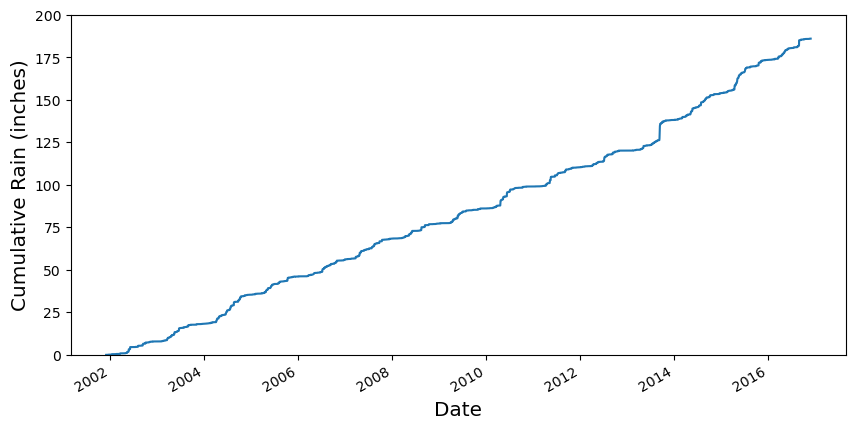

In [67]:
# The time intervals of the data are irregular because the tips are.
# As such, the easiest way to initially visualize the data is using a cumulative plot (i.e., adding up values through time)
# Let's use the tip data to generate a new column that records cumulative rainfall.

# Generate new column that records cumulative rainfall
data_clean['cum_rain'] = data_clean['rain_in'].cumsum()

# Plot time series using matplotlib
fig, ax = plt.subplots(1,1)
data_clean['cum_rain'].plot()

# Format axes
ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Cumulative Rain (inches)', fontsize='x-large')
ax.set_ylim(0,200)

# Set size of figure
fig.set_size_inches(10,5)

<div class="alert alert-block alert-info">
<b>Thought Questions</b>
<details closed>
<summary>1. What does the stair step pattern in cumulative rainfall represent?</summary>
    <ul><li>Seasonal rainfall would explain the annual periodicity of steps.</li>
        <li>The magnitude of steps is also suggestive of large individual events.</li>
        <li>The 2013 event clearly stands out in this plot.</li>
    </ul>
</details>
<details closed>
<summary> 2. What are the limitations of visualizing the data on cumulative plot?</summary>
    <ul><li>It is hard to 'see' individual events, especially smaller ones.</li></li>
        <li>It is perhaps more natural to think of rainfall in terms of rainfall rates. </li>
    </ul>
</details>
</div>

In [68]:
# To convert our data into rates we need to divide the volume of each tip by the time that has passed between them.
# Let's also convert our data into metric units as we go.

# Create a new empty pandas dataframe that we will populate using the cleaned data
Filter_Plant = pd.DataFrame({'dt_seconds': [],
                             'rain_mm': [],
                             'rain_rate_mmphr': []})

In [69]:
# Now let's fill in each of our columns with exactly what we need.

# Time between observations.
# When we do operations on datetime object; we can use the timedelta64 method to specify our units
Filter_Plant['dt_seconds'] = data_clean.index.to_series().diff() / np.timedelta64(1,'s')

# Convert the bucket volumes to mm
Filter_Plant['rain_mm'] = 25.4 * data_clean['rain_in']

# Now we can calculate rainfall rate in mm / hr
# Note that the rain rate represents the time between the previous row and the current row.
Filter_Plant['rain_rate_mmphr'] = 60 * 60 * Filter_Plant['rain_mm'] / Filter_Plant['dt_seconds']

Filter_Plant.head()

,dt_seconds,rain_mm,rain_rate_mmphr
date_time,,,
2001-11-29 19:44:46,NaN,0.0,NaN
2001-11-30 07:44:29,43183.0,0.0,0.0
2001-12-01 19:43:36,129547.0,0.0,0.0
2001-12-02 19:43:00,86364.0,0.0,0.0
2001-12-03 07:42:42,43182.0,0.0,0.0


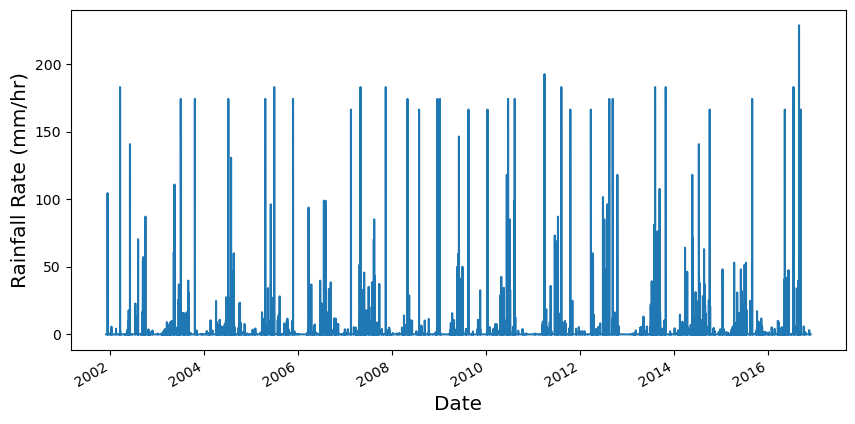

In [70]:
# We can now plot our rainfall rates using sensible units.
# Perhaps we will be able to see our two events in 2013 and 2016.
# Note that the year labels are for January 1 of the specified year

# Plot time series using matplotlib
fig, ax = plt.subplots(1,1)
Filter_Plant['rain_rate_mmphr'].plot()

# Format axes
ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Rainfall Rate (mm/hr)', fontsize='x-large')

# Set size of figure
fig.set_size_inches(10,5)

<div class="alert alert-block alert-info">
<b>Thought Questions</b>
<details closed>
<summary>1. What sets the fastest rainfall rates we can observe?</summary>
    <ul><li>Sensitivity of the tipping bucket.</li>
        <li>Accuracy of the clock.</li>
        <li>Write speed to the data logger.</li>
    </ul>
</details>
<details closed>
<summary> 2. What randomness and regularity do you observe in the time series?</summary>
    <ul><li>Individual rainstorms are very stochastic with different timing, peak values, and perhaps durations.</li></li>
        <li>There appears to be a seasonal signal, though some years it is hard to diagnose (e.g. 2008).</li>
    </ul>
</details>
<details closed>
<summary> 3. How can we go from this time series of rainfall rates to event properties?</summary>
    <ul><li>We need an objective way to define events so that we can examine their properties.</li>
        <li>Let's use the simple indexing of the pandas dataframe to isolate the two events that motivated this exercise.</li>
    </ul>
</details>
</div>

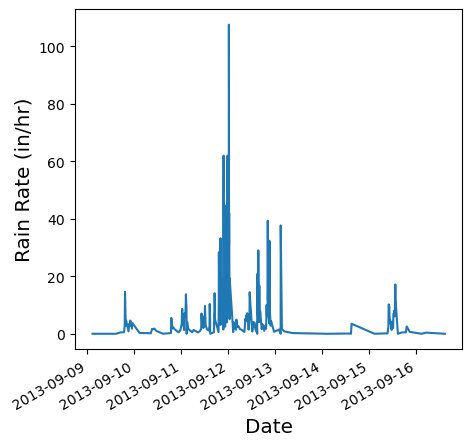

In [71]:
# The nice thing about pandas dataframes is that they are easy to slice and plot data using the index

# Plotting the 2013 event
fig, ax = plt.subplots(1,1)
Filter_Plant['rain_rate_mmphr']['2013-09-09':'2013-09-16'].plot(ax=ax)

# Format axes
ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Rain Rate (in/hr)', fontsize='x-large')

fig.set_size_inches(5,5)

<div class="alert alert-block alert-warning">
<b>Challenge:</b> <i>Plot the 2016 event in the code cell below</i>
<details closed>
<summary> Helpful Hint</summary>
    The default format for indexing for datetime objects is 'yyyy-MM-dd HH:MM:ss' where 'y' is the calendar year, 'M' is month (01-12), 'd' is the day of month (01-31), 'H' is the hour of day (0-23), 'M' is the minute of hour (0-59), and 's' is the second of minute (0-59). In the previous example, we only used the dates and not time. Because the 2016 event is much shorter, you may find it convenient to use the time to slice the data as well.
</details>
<details closed>
<summary> Python code</summary>
    # Plotting 2016 event<br>
    fig, ax = plt.subplots(1,1)<br>
    Filter_Plant['rain_rate_mmphr']['2016-08-30 12':'2016-08-31 12'].plot(ax=ax)<br><br>
    # Format axes<br>
    ax.set_xlabel('Date', fontsize='x-large')<br>
    ax.set_ylabel('Rain Rate (in/hr)', fontsize='x-large')<br><br>   
    fig.set_size_inches(6,5)
</details>
</div>

In [72]:
# Plotting the 2016 event

# Format axes


<div class="alert alert-block alert-info">
<b>Thought Questions</b>
<details closed>
<summary>1. How do these two events differ?</summary>
    <ul><li>Peak rates for the 2016 event are more than two times higher, though last < 2 hrs. </li>
        <li>The duration for the 2013 event is long, though it includes many rainfall 'pulses'.</li>
        <li>The strongest pulse occurred on the night of the 11th and lasted ~8 hrs.</li>
    </ul>
</details>
<details closed>
<summary> 2. What challenges do see with developing objective criteria for defining events?</summary>
    <ul><li>Rainfall during an event can fluctuate a lot, so the simple act of defining what an event can be challenging.</li></li>
        <li>Hiatuses in rainfall are hard to assess (e.g., the 2013 event had many, even though it was all part of a larger scale event).</li>
        <li>Some events are very short and may require high temporal resolution data to resolve (Would we even notice the 2016 event in a daily time series?).</li>
    </ul>
</details>
</div>

## 1.2 Calculating event properties
[Overview](#Overview) &nbsp; &nbsp; [1.1 Importing rain gauge data](#1.1-Importing-rain-gauge-data) &nbsp; &nbsp; __[1.2 Calculating event properties](#1.2-Calculating-event-properties)__ &nbsp; &nbsp; [1.3: Using Landlab to simulate stochastic rainfall](#1.3-Using-Landlab-to-simulate-stochastic-rainfall) &nbsp; &nbsp; [Definitions](#Definitions)

> Now that we have some data, let's use it to characterize properties of these two rainstorms. In order to do this, we will need to define when an event begins and when it ends. As you might have already noticed, this can be a non-trivial task. In this section, we will characterize two historic events at the Filter Plant meteorological station using two parameters: the event duration and intensity. We will also plot the tipping bucket observations against their equivalent rectangular pulses.

<div class="alert alert-block alert-info">
<b>Poisson Rectangular Pulses</b><br>The Poisson rectangular pulse rainfall model was developed by <a href="https://doi.org/10.1029/WR014i005p00713">Eagleson (1978)</a>. Storms are represented as random 'pulses' of rainfall where intensities, durations, and inter-storm periods each follow an exponential probability distribution than can be characterized using a single parameter. Figure 2 shows how an observed series of rainstorms can be represented using rectangular pulses. For a nice example for how this description of stochastic rainfall can be used to drive a landscape evolution model see <a href="https://doi.org/10.1029/2000WR900065">Tucker & Bras (2000)</a>.
</div>

<left><img src="resources/rectangular_pulses.png" width="900"/>

__Figure 2:__ A series of observed storms can be readily represented as a series of rectangular pulses that have a mean [__storm intensity__](#Definitions), [__storm duration__](#Definitions), and [__inter-storm period__](#Definitions). The above example shows how observations from the [__hyetograph__](#Definitions) are translated into rectangular pulses. Depending on the variance of rainfall rates during each event, rectangular pulses will look more or less like observations. Note that the highest intensity rectangular pulses (e.g., event #2) need not correspond to the highest intensities observed in the hyetograph (e.g., event #5).

In [73]:
# Let's first create a new dataframe
# If you just slice, variables will refer to the sliced dataframe (i.e., retains a connection to its source)
# To make a new copy, we can use the copy method
event_2013 = Filter_Plant['2013-09-07 00':'2013-09-17 00'].copy()                   # make new dataframe we can play with

# Let's clean our copy up a bit
event_2013['cum_rain_mm'] = event_2013['rain_mm'].cumsum()                          # cumulative sum in mm
event_2013 = event_2013.drop(['dt_seconds', 'rain_rate_mmphr', 'rain_mm'], axis=1)  # get rid of other columns

# Now, let's regularize the time series so that the series represents equal time intervals
dt = 1                                                                              # averaging interval [minutes]
event_2013r = event_2013.resample(f"{dt}min").mean()                                # first resample for averaging interval
event_2013r = event_2013r.interpolate(method='linear')                              # now lets interpolate the data
event_2013r['rain_rate_mmphr'] = (60/dt)*event_2013r['cum_rain_mm'].diff()          # lets turn it into a rainfall rate again

# Let's check to see what we've done
event_2013r.tail()

,cum_rain_mm,rain_rate_mmphr
date_time,,
2013-09-16 14:22:00,245.872,0.0
2013-09-16 14:23:00,245.872,0.0
2013-09-16 14:24:00,245.872,0.0
2013-09-16 14:25:00,245.872,0.0
2013-09-16 14:26:00,245.872,0.0


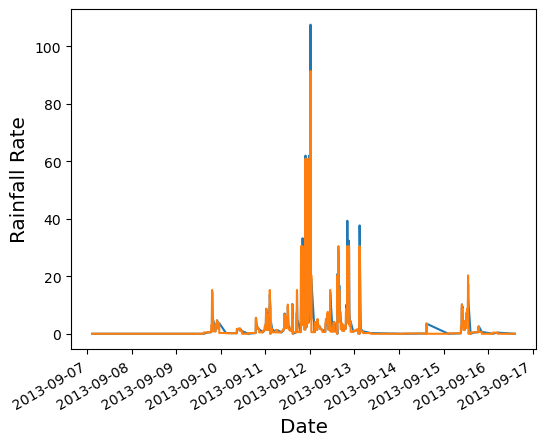

In [74]:
# Plotting 2013 event
# Let's compare the original data to our 'new' resampled version.
fig, ax = plt.subplots(1,1)
Filter_Plant['rain_rate_mmphr']['2013-09-07 00':'2013-09-17 00'].plot(ax=ax)
event_2013r['rain_rate_mmphr'].plot(ax=ax)

# Format axes
ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Rainfall Rate', fontsize='x-large')

# Set figure size
fig.set_size_inches(6,5)

<div class="alert alert-block alert-info">
<b>Thought Questions</b>
<details closed>
<summary>1. What did interpolating the data at equal time intervals do?</summary>
    <ul><li>Peak rainfall rates were reduced. </li>
        <li>Isolated, individual tips decay more abruptly.</li>
    </ul>
</details>
<details closed>
<summary> 2. What challenges do see with developing objective criteria for defining events?</summary>
    <ul><li>Rainfall during an 'event' can fluctuate a lot, so the simple act of defining what an event can be challenging.</li></li>
        <li>Hiatuses in rainfall are hard to assess (e.g., the 2013 event had many, even though it was part of larger scale event).</li>
    </ul>
</details>
</div>

In [75]:
# Isolating a pulse of rainfall
# We will need two terms to do this (a threshold rainfall rate and a threshold hiatus length)

# Set a threshold rainfall rate
threshold = 1    # mm/hr
event_2013r['threshold_flag'] = event_2013r['rain_rate_mmphr']
event_2013r['threshold_flag'][event_2013r['threshold_flag'] < threshold] = 0   # set flag to zero below threshold
event_2013r['threshold_flag'][event_2013r['threshold_flag'] > threshold] = 1   # set flag to 1 above threshold

# Set a threshold hiatus
dt = 30         # in units of dt so minutes
event_2013r['cumulative_flag'] = event_2013r['threshold_flag'].rolling(dt, min_periods=1).sum()
event_2013r['cumulative_flag'][event_2013r['cumulative_flag'] < 1] = 0   # set flag to zero below threshold
event_2013r['cumulative_flag'][event_2013r['cumulative_flag'] > 0] = 1   # set flag to zero below threshold

# Inspect what we have done.
event_2013r.tail()

,cum_rain_mm,rain_rate_mmphr,threshold_flag,cumulative_flag
date_time,,,,
2013-09-16 14:22:00,245.872,0.0,0.0,0.0
2013-09-16 14:23:00,245.872,0.0,0.0,0.0
2013-09-16 14:24:00,245.872,0.0,0.0,0.0
2013-09-16 14:25:00,245.872,0.0,0.0,0.0
2013-09-16 14:26:00,245.872,0.0,0.0,0.0


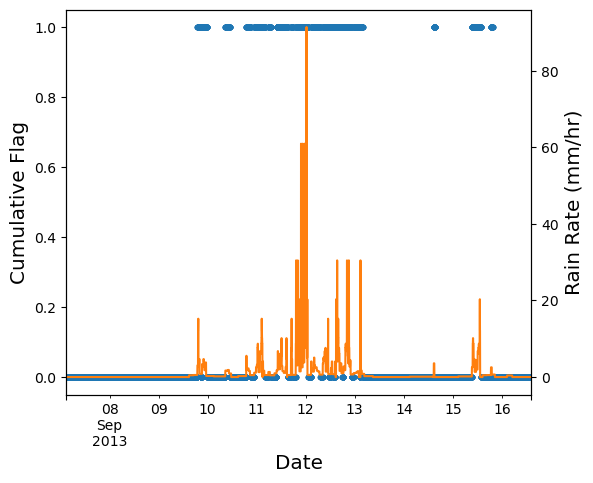

In [76]:
# Its hard to assess what we just did using the lat five time steps
# Let's plot it up to see how are thresholds are behaving
fig, ax = plt.subplots(1,1)

# Plot flags and rainfall rate on a double y axis
event_2013r['cumulative_flag'].plot(style=".")
event_2013r['rain_rate_mmphr'].plot(ax=ax, secondary_y=True)


# Format axes
ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Cumulative Flag', fontsize='x-large')
ax.right_ax.set_ylabel('Rain Rate (mm/hr)', fontsize='x-large')

# Set figure size
fig.set_size_inches(6,5)

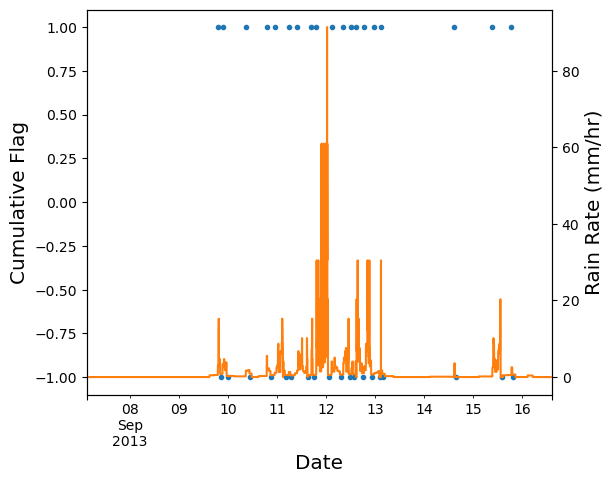

In [77]:
# We really only want to see the beginning and end of events, not the flags at each interval
# We can revise this to be only the times where an event is beginning or ending based on our criteria
event_2013r['event_flag'] = event_2013r['cumulative_flag'].diff()
event_2013r['event_flag'].replace(0.,np.NaN,inplace=True)

# Let's plot it up again
fig, ax = plt.subplots(1,1)
event_2013r['event_flag'].plot(style='.')
event_2013r['rain_rate_mmphr'].plot(ax=ax, secondary_y=True)

# Format axes
ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Cumulative Flag', fontsize='x-large')
ax.right_ax.set_ylabel('Rain Rate (mm/hr)', fontsize='x-large')

# Set figure size
fig.set_size_inches(6,5)

In [78]:
# Let's isolate the longest continuous pulse of rainfall that met our event criteria.
start = event_2013r.index[event_2013r['event_flag']==1]
end = event_2013r.index[event_2013r['event_flag']==-1]
duration = end - start

# Keep track of index and max duration as we iterate through different pulses of high rainfall
ind = 0                # store index
max = duration[0]      # initialize with max element

# For loop is retaining only the longest pulse we observe
for i in range (1,len(duration)):    #iterate
    if duration[i] > max:            #check max value
        max = duration[i]
        max_st = start[i]
        max_en = end[i]  
        ind = i

# Print to terminal what we discovered
print(f'The longest duration event is number {ind+1} out of {len(duration)}.')
print(f'It began on {max_st} and ended on {max_en}, lasting {max}.')

The longest duration event is number 9 out of 19.
It began on 2013-09-11 19:05:00 and ended on 2013-09-12 01:16:00, lasting 0 days 06:11:00.


In [79]:
# Let's summarize the properties of the longest pulse of rainfall during the 2013 event using what we learned
total_mm = event_2013r['cum_rain_mm']['2013-09-12 06:11:00'] - event_2013r['cum_rain_mm']['2013-09-11 19:05:00']
duration_sec = max.seconds
intensity_mmphr = 60*60*total_mm / duration_sec

# Print results
print(f'For this {duration_sec/(60*60):0.2f}-hr pulse, the average intensity was {intensity_mmphr:0.1f} mm/hr.')

For this 6.18-hr pulse, the average intensity was 12.7 mm/hr.


<div class="alert alert-block alert-warning">
<b>Challenge:</b> <i>What were the intensity-duration statistics for the 2016 event?</i>
<details closed>
<summary> Helpful Hint</summary>
    You can use copy and paste the last six cells into one code block to get started. You may want to skip all the plotting steps. Headers are provided below to remind you of what we did and the order in which we did it. You might find chunking out these steps in their own code blocks first will help you troubleshoot your code before running it all at once.
</details>
<details closed>
<summary> Python code</summary>
    # Calculating intensity - duration stats from 2016 event<br>
    # First, copy the approximate range of dates when it occurred <br>
    event_2016 = Filter_Plant['2016-08-30 00':'2016-09-01 00'].copy()                   # make new dataframe we can play with<br>
    event_2016['cum_rain_mm'] = event_2016['rain_mm'].cumsum()                          # cumulative sum in mm<br>
    event_2016 = event_2016.drop(['dt_seconds', 'rain_rate_mmphr', 'rain_mm'], axis=1)  # get rid of other columns<br><br>
    # Now, regularize the time series so series represents equal time intervals<br>
    dt = 1                                                                              # averaging interval [minutes]<br>
    event_2016r = event_2016.resample(f"{dt}min").mean()                                # first resample for averaging interval<br>
    event_2016r = event_2016r.interpolate(method='linear')                              # now lets interpolate the data<br>
    event_2016r['rain_rate_mmphr'] = (60/dt)*event_2016r['cum_rain_mm'].diff()          # lets turn it into a rainfall rate again<br><br>
    # Set a threshold rainfall rate<br>
    threshold = 1    # mm/hr<br>
    event_2016r['threshold_flag'] = event_2016r['rain_rate_mmphr']<br>
    event_2016r['threshold_flag'][event_2016r['threshold_flag'] < threshold] = 0   # set flag to zero below threshold <br>
    event_2016r['threshold_flag'][event_2016r['threshold_flag'] > threshold] = 1   # set flag to 1 above threshold<br><br>
    # Set a hiatus threshold for defining events<br>
    dt = 30         # in units of dt, so minutes<br>
    event_2016r['cumulative_flag'] = event_2016r['threshold_flag'].rolling(dt, min_periods=1).sum()<br>
    event_2016r['cumulative_flag'][event_2016r['cumulative_flag'] < 1] = 0   # set flag to zero below threshold<br>
    event_2016r['cumulative_flag'][event_2016r['cumulative_flag'] > 0] = 1   # set flag to zero below threshold<br><br>
    # Identify the start (+1) and end (-1) of event using differencing between time steps<br>
    event_2016r['event_flag'] = event_2016r['cumulative_flag'].diff()        # calculate differences between cum flag<br>
    event_2016r['event_flag'].replace(0.,np.NaN,inplace=True)                # treat zeros as NaN<br><br>
    # Make arrays of start and end times<br>
    start = event_2016r.index[event_2016r['event_flag']==1]<br>
    end = event_2016r.index[event_2016r['event_flag']==-1]<br>
    duration = end - start<br><br>
    # Use a for loop to identify maximum duration event<br> 
    ind = 0                # store index<br>
    max = duration[0]      # initialize<br>
    max_st = start[0]<br>
    max_en = end[0]<br>
    for i in range (0,len(duration)):    #iterate<br>
    if duration[i] > max:            #check max value<br>
        max = duration[i]<br>
        max_st = start[i]<br>
        max_en = end[i]<br>  
        ind = i<br><br>
    # Print results of for loop<br>
    print(f'The longest duration event is number {ind+1} out of {len(duration)}.')<br>
    print(f'It began on {max_st} and ended on {max_en}, lasting {max}.')<br><br>
    # Use dates to calculate the total rainfall and duration<br>
    total_mm = event_2016r['cum_rain_mm']['2016-08-30 22:33:00'] - event_2016r['cum_rain_mm']['2016-08-30 20:42:00']<br>
    duration_sec = max.seconds<br><br>
    # Convert this into an average rainfall rate for the event<br>
    intensity_mmphr = (60*60*total_mm/duration_sec)<br>
    print(f'For this {duration_sec/(60*60):0.2f}-hr rainstorm, the average intensity was {intensity_mmphr:0.1f} mm/hr.')
</details>
</div>

In [80]:
# Calculating intensity - duration stats from 2016 event
# First, copy the approximate range of dates when it occurred

# Now, regularize the time series so series represents equal time intervals

# Set a threshold rainfall rate

# Set a hiatus threshold for defining events

# Identify the start (+1) and end (-1) of event using differencing between time steps

# Make arrays of start and end times

# Use a for loop to identify maximum duration event 

# Print results of for loop

# Use dates to calculate the total rainfall and duration

# Convert this into an average rainfall rate for the event


<div class="alert alert-block alert-info">
<b>Thought Questions</b>
<details closed>
<summary>1. How do these two rainstorm events compare?</summary>
    <ul><li>For a 1 mm/hr intensity threshold and 30 minute hiatus threshold: </li>
        <li>The most intense pulse in 2013 was ~3X longer than the 2016 event (6:11 vs. 1:51).</li>
        <li>The average intensity in 2016 was ~3X larger than in the 2013 event (39.0 vs. 12.7 mm/hr).</li>
        <li>Note that mean rainfall rates are much lower than peaks (2013 event exceeded 80 mm/hr; 2016 event exceeded 150 mm/hr).</li>
    </ul>
</details>
<details closed>
<summary>2. For these two events (and at this site) were the storm depths similar?</summary>
    <ul><li>YES, at least when only comparing the most intense pulse in 2013 with the 2016 event. </li>
        <li>2013 event: 6.18 hrs X 12.7 mm/hr = 78.5 mm.</li>
        <li>2016 event: 1.85 hrs X 39.0 mm/hr = 72.15 mm.</li>
    </ul>
</details>
<details closed>
<summary> 3. What assumptions underlie reported rainfall intensities, durations, and inter-storm period?</summary>
    <ul><li>Intensity-hiatus thresholds work well for isolated events, but perhaps less so for longer duration ones.</li></li>
        <li>Rainfall rates and durations are tightly related to averaging interval and event criteria.</li>
        <li>Storm depth may be more important for some processes, while peak rainfall intensities might matter for others.</li>
    </ul>
</details>
</div>

## 1.3 Using Landlab to simulate stochastic rainfall
[Overview](#Overview) &nbsp; &nbsp; [1.1 Importing rain gauge data](#1.1-Importing-rain-gauge-data) &nbsp; &nbsp; [1.2 Calculating event properties](#1.2-Calculating-event-properties) &nbsp; &nbsp; __[1.3: Using Landlab to simulate stochastic rainfall](#1.3-Using-Landlab-to-simulate-stochastic-rainfall)__ &nbsp; &nbsp; [Definitions](#Definitions)

> Now that we have a feel for the intensities and durations of significant rainfall events, let's build a stochastic rainfall generator that can produce these kinds of events. While we did not explicitly calculate the interstorm periods, we will see below that mean precipitation provides a strong constraint on what the average time between events are for a given average storm depth.

<left><img src="resources/mean_precipitation.png" width="600"/>

__Figure 3:__ The amount of precipitation that fell during the 2013 event made up to 75% of it annual precipitation budget. Because mean [__storm intensity__](#Definitions), [__storm duration__](#Definitions), and [__inter-storm period__](#Definitions) make up the annual average, any stochastic rainfall generator needs to honor both event statistics as well as mean annual ones. We will use the inter-storm period to honor this constraint below when considering different storm properties. 

In [81]:
# First, let's create two scenarios that simply honor the 3X difference in intensities
# Define stochastic parameters
storm_intensity = [3, 9]           # mm/hr...note 3X
storm_duration = [9, 3]            # hrs...note 3X
interstorm_duration = [300, 306]   # hrs...see calc below [produces mean annual precipitation of ~1044 mm/yr]

# Calculate mean storm depth
storm_depth = []                # mm
storm_depth.append(storm_intensity[0] * storm_duration[0])
storm_depth.append(storm_intensity[1] * storm_duration[1])

# Calculate mean annual precipitation
map = []
map.append(((storm_intensity[0] * storm_duration[0]) / (storm_duration[0] + interstorm_duration[0])) * 24 * 365)
map.append(((storm_intensity[1] * storm_duration[1]) / (storm_duration[1] + interstorm_duration[1])) * 24 * 365)

# Print values to check and see if they are the same            
print(f'Mean storm depth: {storm_depth[0]: 0.1f} and {storm_depth[1]: 0.1f} mm')
print(f'Mean annual precipiation: {map[1]: 0.1f} and {map[1]: 0.1f} mm/yr')

Mean storm depth:  27.0 and  27.0 mm
Mean annual precipiation:  765.4 and  765.4 mm/yr


<div class="alert alert-block alert-info">
<b>Landlab Components</b><br> The <a href="https://landlab.github.io/#/"><i>Landlab</i></a> modeling library was built to lower the barrier for scientists to construct their own numerical models of surface dynamics. One key strength of this modeling library is that individual processes are treated in a modular way such that individual components can be more readily combined. The first component we will work with the <a href="https://landlab.readthedocs.io/en/master/reference/components/uniform_precip.html"><i>PrecipitationDistribution</i></a> component that generates Poisson rectangular pulses of rainfall. In the next chapter, we will build on this first component by combining it with others to build a simple model of runoff generation driven by stochastic rainfall.
</div>

In [82]:
# Let's import our first component from Landlab
from landlab.components.uniform_precip import PrecipitationDistribution

# Let's instantiate two versions of this component with differen rainfall parameters
precip1 = PrecipitationDistribution(mean_storm_duration=storm_duration[0], mean_interstorm_duration=interstorm_duration[0],
                                   mean_storm_depth=storm_depth[0], total_t=60*24, delta_t=1., random_seed=2)
precip2 = PrecipitationDistribution(mean_storm_duration=storm_duration[1], mean_interstorm_duration=interstorm_duration[1],
                                   mean_storm_depth=storm_depth[1], total_t=60*24, delta_t=1., random_seed=4)

# Method that returns event properties
series1 = precip1.get_storm_time_series()   # Time series #1
series2 = precip2.get_storm_time_series()   # Time series #2

<div class="alert alert-block alert-info">
<b>Building Functions</b><br> Functions can be a useful way to organize small snippets of code that you want to re-use multiple times. In this example, we want to take the result from the rainfall generator and plot the time series of events it generates as rectangular pulses. The Landlab component produces a series of <i>start_times</i>, <i>end_times</i>, and <i>storm_intensities</i> for a given set of mean rainfall parameters. However, we will need to convert these event properties into plotting positions for our rectangular pulses if we want to visualize the time series. Each rectangular pulse needs four locations specified for plotting (0 intensity at beginning of event, mean intensity at beginning of event, mean intensity at end of event, 0 intensity at end of event). Let's build a function that takes the event parameters from Landlab and returns the corresponding plotting positions.
</div>

In [83]:
# Define a function that takes event properties and returns plotting positions
def rectangular_pulses(series):
    time = []
    intensity = []
    
    for i in range(len(series)):
        time.append(series[i][0])       # event start
        time.append(series[i][0])       # event start
        time.append(series[i][1])       # event end
        time.append(series[i][1])       # event end
        intensity.append(0)             # zero intensity
        intensity.append(series[i][2])  # mean event intensity
        intensity.append(series[i][2])  # mean event intensity
        intensity.append(0)             # zero intensity
    
    return time, intensity              # returns series of times (x) and intensities (y)

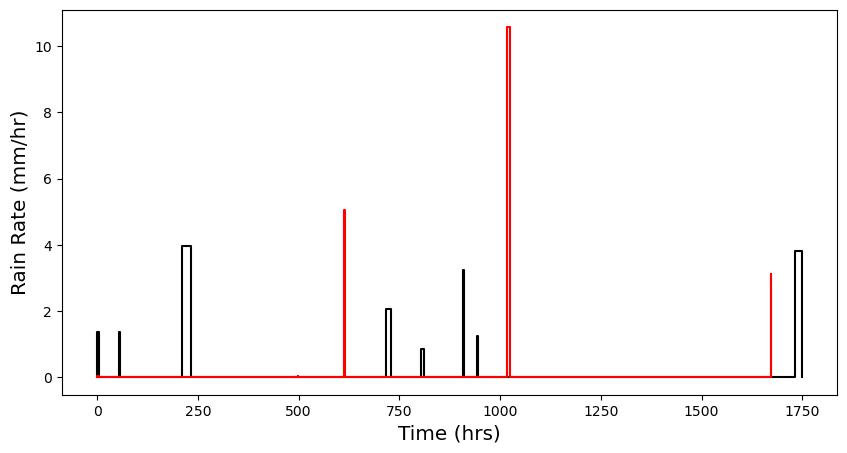

In [84]:
# Plot our two time series side-by-side using matplotlib
fig, ax = plt.subplots(1,1)

# Let's use our function to give us what we need
[time, intensity] = rectangular_pulses(series1)
plt.plot(time,intensity,'-k')

# For plotting, we can just keep overwriting our variables
[time, intensity] = rectangular_pulses(series2)
plt.plot(time,intensity,'-r')

# Format axes
ax.set_xlabel('Time (hrs)', fontsize='x-large')
ax.set_ylabel('Rain Rate (mm/hr)', fontsize='x-large')

# Set figure size
fig.set_size_inches(10,5)

In [85]:
# Let's work with these series as numpy arrays
s1=np.asarray(series1)        # numpy array
s2=np.asarray(series2)        # numpy array
s1d = s1[:,1] - s1[:,0]       # event durations
s2d = s2[:,1] - s2[:,0]       # event durations

# Report the longest durations and intensities on record
print(f'Series 1: The longest duration is {np.max(s1d):0.2f} hrs, and the highest intensity is {np.max(s1[:,2]):0.1f} mm/hr.')
print(f'Series 2: The longest duration is {np.max(s2d):0.2f} hrs, and the highest intensity is {np.max(s2[:,2]):0.1f} mm/hr.')

Series 1: The longest duration is 22.50 hrs, and the highest intensity is 4.0 mm/hr.
Series 2: The longest duration is 5.79 hrs, and the highest intensity is 10.6 mm/hr.


<div class="alert alert-block alert-warning">
<b>Challenge:</b> <i>In a 50-year record, how many events were as intense as the 2016 event in your two series?</i>
<details closed>
<summary> Helpful Hint</summary>
    You do not need to import the Landlab component <a href="https://landlab.readthedocs.io/en/master/reference/components/uniform_precip.html"><i>PrecipitationDistribution</i></a> again nor do you need to rebuild your plotting function. All you need to do is uses the workflow from above using a different total time. The last step will also require you to slice your numpy array of intensities to find the number of values above the intensity of the 2016 event (39 mm/hr).
</details>
<details closed>
<summary> Python code</summary>
    # Define stochastic parameters<br>
    storm_intensity = [3, 9]           # mm/hr...note 3X<br>
    storm_duration = [6, 2]            # hrs...note 3X<br>
    interstorm_duration = [900, 300]   # hrs...see calc below [produces mean annual precipitation of ~1044 mm/yr]<br><br>
    # We can build two precipitation distributions using our statistical parameters<br>
    precip1 = PrecipitationDistribution(mean_storm_duration=storm_duration[0], mean_interstorm_duration=interstorm_duration[0],<br>
    mean_storm_depth=storm_depth[0], total_t=10*365*24, delta_t=1., random_seed=0)<br>
    precip2 = PrecipitationDistribution(mean_storm_duration=storm_duration[1], mean_interstorm_duration=interstorm_duration[1],<br>
    mean_storm_depth=storm_depth[1], total_t=10*365*24, delta_t=1., random_seed=1)<br><br>
    # Object method that returns event properties<br>
    series1 = precip1.get_storm_time_series()<br>
    series2 = precip2.get_storm_time_series()<br><br>
    # Let's work with these series as numpy arrays<br>
    s1=np.asarray(series1)        # numpy array<br>
    s2=np.asarray(series2)        # numpy array<br>
    s1d = s1[:,1] - s1[:,0]       # event durations<br>
    s2d = s2[:,1] - s2[:,0]       # event durations<br><br>
    # Find the events > 39 mm/hr<br>
    s1count = len(s1[s1[:,2]>39])<br>
    s2count = len(s2[s2[:,2]>39])<br><br>
    # Report your results<br>
    print(s1count)<br>
    print(s2count)<br>
</details>
</div>

In [86]:
# Define stochastic parameters

# We can build two precipitation distributions using our statistical parameters

# Object method that returns event properties

# Work with these series as numpy arrays

# Find the events > 39 mm/hr

# Report your results


<div class="alert alert-block alert-info">
<b>Thought Questions</b>
<details closed>
<summary>1. Is our stochastic rainfall generator producing the right amount of 2016-level events?</summary>
    <ul><li>Probably not. 11 events in 10 years suggests that it is occurring too frequently.</li>
        <li>Note that we started with a mean intensity of  9 mm/hr.</li>
        <li>The 2013-based rainfall generator produced 0 events like 2016 so we probably need somthing in between 3 and 9 mm/hr.</li>
    </ul>
</details>
<details closed>
<summary>2. What is the challenge of honoring both 2013- and 2016-type events using single rainfall generator?</summary>
    <ul><li>Because the Poisson distribution assumes exponential intensities and durations, it is is hard to represent different rainfall sources.</li>
        <li>Synoptic-scale rainfall and convective rainfall are likely drawn from different probability distributions</li>
        <li>We could include both but would need to be careful about honoring mean annual totals as well as seasonality.</li>
    </ul>
</details>
</div>

### You have now completed Chapter 1

Continue on to [Chapter 2: From rainfall to runoff](./Chapter-2.ipynb)

## Definitions
[Overview](#Overview) &nbsp; &nbsp; [1.1 Importing rain gauge data](#1.1-Importing-rain-gauge-data) &nbsp; &nbsp; [1.2 Calculating event properties](#1.2-Calculating-event-properties) &nbsp; &nbsp; [1.3: Using Landlab to simulate stochastic rainfall](#1.3-Using-Landlab-to-simulate-stochastic-rainfall) &nbsp; &nbsp; __[Definitions](#Definitions)__


__exceedance probability__:<br>
> The probability of a given magnitude event _or greater_ occurring (e.g., 100-yr storm).

__hyetograph__:<br>
> A plot of observed rainfall intensities as a function of time interval.

__inter-storm period__:<br>
> The amount of time between rainstorms. This value will be sensitive to how an event is defined.

__overland flow__:<br>
> When rainfall (or snowmelt) rates exceed the infiltration or storage capacity of the surface soils, leading to surface runoff.

__rills__:<br>
> Very small channels that can form when overland flow accumulates and erodes a hillside.

__storm depth__:<br>
> The total amount of rain that falls during an event. To calculate this value, multiply the storm duration by its average intensity.

__storm duration__:<br>
> The length of time a rainstorm lasts. This value will be sensitive to how an event is defined.

__storm intensity__:<br>
> The rate at which rain falls over some user-defined averaging interval (e.g., 15-minute, hourly, daily rates).

__tipping bucket rain gauge__:<br>
> A type of rain gauge that collects rain water using a funnel that leads to small bucket. When the bucket fills, it topples to expose a new empty bucket that is attached to it. The gauge records the time of the tips, which can then be translated into a rate because the volume of the bucket is known.